In [45]:
import pandas as pd

In [46]:
import numpy as np

In [47]:
df = pd.read_csv('titanic_toy.csv')

In [48]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [ ]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train ,y_test = train_test_split(df.drop(columns=['Survived']) , df.Survived ,test_size=0.2, random_state=2)

In [ ]:
x_train.shape

(712, 3)

In [ ]:
x_test.shape

(179, 3)

In [ ]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [ ]:
mean_age = x_train.Age.mean()
median_age = x_train.Age.median()

In [ ]:
mean_fare = x_train.Fare.mean()
median_fare = x_train.Fare.median()

In [ ]:
x_train['age_mean'] = x_train.Age.fillna(mean_age)
x_train['age_median'] = x_train.Age.fillna(median_age)

In [ ]:
x_train['fare_mean'] = x_train.Fare.fillna(mean_fare)
x_train['fare_median'] = x_train.Fare.fillna(median_fare)

In [ ]:
x_train

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [ ]:
x_train.Age.isna().sum()

np.int64(148)

In [ ]:
x_train.age_mean.isna().sum()

np.int64(0)

In [ ]:
x_train.age_median.isna().sum()

np.int64(0)

In [ ]:
x_train.Fare.isna().sum()

np.int64(36)

In [ ]:
x_train.fare_mean.isna().sum()

np.int64(0)

In [ ]:
x_train.fare_median.isna().sum()

np.int64(0)

In [ ]:
x_train.Age.var()

np.float64(204.34951339046142)

In [ ]:
x_train.age_mean.var()

np.float64(161.81262452718676)

In [ ]:
x_train.age_median.var()

np.float64(161.98956633460548)

In [ ]:
x_train.Fare.var()

np.float64(2448.1979137063163)

In [ ]:
x_train.fare_mean.var()

np.float64(2324.2385256705534)

In [ ]:
x_train.fare_median.var()

np.float64(2340.09102197536)

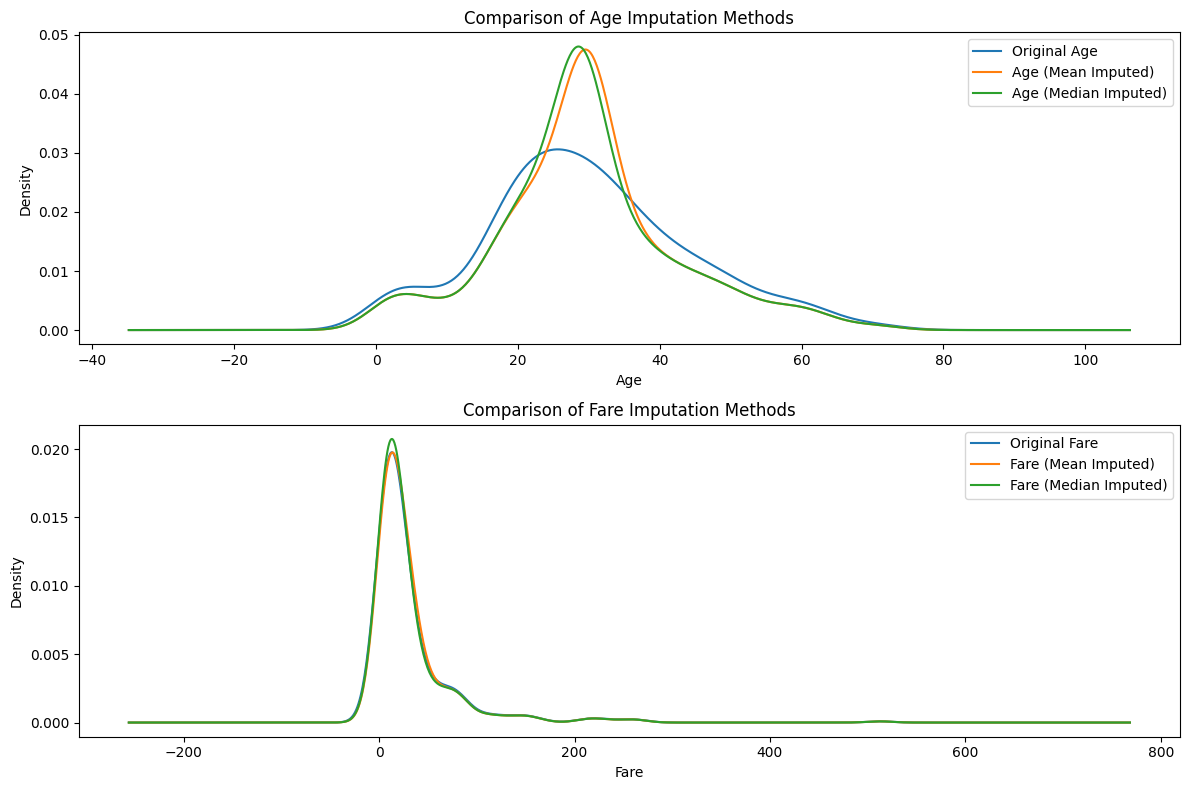

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot Age columns
x_train[['Age', 'age_mean', 'age_median']].plot(kind='kde', ax=axes[0])
axes[0].set_title('Comparison of Age Imputation Methods')
axes[0].set_xlabel('Age')
axes[0].legend(['Original Age', 'Age (Mean Imputed)', 'Age (Median Imputed)'])

# Plot Fare columns
x_train[['Fare', 'fare_mean', 'fare_median']].plot(kind='kde', ax=axes[1])
axes[1].set_title('Comparison of Fare Imputation Methods')
axes[1].set_xlabel('Fare')
axes[1].legend(['Original Fare', 'Fare (Mean Imputed)', 'Fare (Median Imputed)'])

plt.tight_layout()
plt.show()

In [50]:
x_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [52]:
x_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

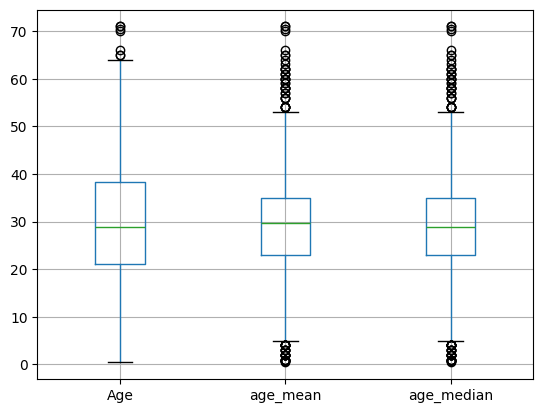

In [55]:
x_train[['Age','age_mean','age_median']].boxplot()

<Axes: >

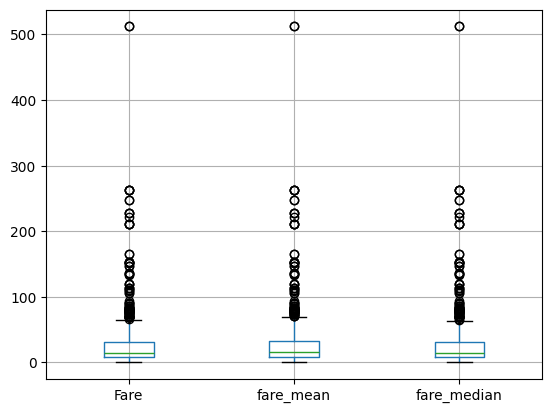

In [59]:
x_train[['Fare','fare_mean','fare_median']].boxplot()

Now using the sklearn

It takes the missing value and strategy as a attributes, fill value mainly.

In [60]:
x_train, x_test , y_train,y_test = train_test_split(df.drop(columns=['Survived']) , df.Survived ,test_size=0.2, random_state=2)

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [72]:
impute_mean = SimpleImputer(strategy='mean')

In [73]:
impute_median = SimpleImputer(strategy='median')

In [74]:
t1 = ColumnTransformer([

    ('impute_mean' , impute_mean, ['Fare']),
    ('impute_median' , impute_median, ['Age'])
],remainder='passthrough')

In [75]:
t1.fit(x_train)

,transformers,"[('impute_mean', ...), ('impute_median', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [76]:
t1.named_transformers_['impute_mean'].statistics_

array([32.61759689])

In [77]:
t1.named_transformers_['impute_median'].statistics_

array([28.75])

In [78]:
x_train  = t1.transform(x_train)

In [79]:
x_test = t1.transform(x_test)

In [80]:
x_train

array([[ 27.7208,  40.    ,   0.    ],
       [ 16.7   ,   4.    ,   2.    ],
       [  9.    ,  47.    ,   0.    ],
       ...,
       [ 49.5042,  71.    ,   0.    ],
       [221.7792,  28.75  ,   0.    ],
       [ 25.925 ,  28.75  ,   0.    ]], shape=(712, 3))

In [81]:
x_test

array([[ 26.2875    ,  42.        ,   0.        ],
       [  8.05      ,  21.        ,   0.        ],
       [ 65.        ,  24.        ,   3.        ],
       [ 56.4958    ,  28.        ,   0.        ],
       [  7.925     ,  17.        ,   6.        ],
       [  7.8958    ,  30.        ,   0.        ],
       [ 30.        ,  80.        ,   0.        ],
       [  7.25      ,  25.        ,   0.        ],
       [133.65      ,  50.        ,   2.        ],
       [ 26.        ,  25.        ,   1.        ],
       [ 26.        ,  35.        ,   0.        ],
       [ 90.        ,  35.        ,   1.        ],
       [ 16.        ,  55.        ,   0.        ],
       [ 56.4958    ,  28.75      ,   0.        ],
       [ 56.4958    ,  28.75      ,   0.        ],
       [  7.8542    ,  19.        ,   1.        ],
       [ 15.2458    ,  28.75      ,   2.        ],
       [  0.        ,  49.        ,   0.        ],
       [ 32.61759689,  18.        ,   1.        ],
       [  7.75      ,  65.     

In [82]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [84]:
df.Age.isnull().sum()

np.int64(177)

In [85]:
x_train

array([[ 27.7208,  40.    ,   0.    ],
       [ 16.7   ,   4.    ,   2.    ],
       [  9.    ,  47.    ,   0.    ],
       ...,
       [ 49.5042,  71.    ,   0.    ],
       [221.7792,  28.75  ,   0.    ],
       [ 25.925 ,  28.75  ,   0.    ]], shape=(712, 3))